I want to reduce dimensions from my dataset to improve clustering. Here I try dimension reduction with PCA.
Also see the following link to make a scree plot with PCA.
This link is useful: https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

"Finally, explicitly cast the DataFrame into a numpy array which can be used  by the scikit-learn API. Note that at this point you lose your feature labels (Headers), so it would be difficult to keep track of the features if you use the "feature-importance" routine in scikit-learn. I have the practice of saving the headers before casting the data-frame into a numpy array. [>>list(<DataFrame>) prints out the headers into a nice list]"

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn.preprocessing import scale, robust_scale

Read in a well of unnormalized data as a numpy array

In [99]:
'''
# Read data directly in as a numpy array. Not in use, it can't handle headers or columns of different type
#my_data = np.genfromtxt(
#    '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_i12.csv',
#    delimiter=','); # This might not work because of the metadata, 
## maybe import as pandas df then subset to a numpy array, then label with the metadata
'''

"\n# Read data directly in as a numpy array. Not in use, it can't handle headers or columns of different type\n#my_data = np.genfromtxt(\n#    '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_i12.csv',\n#    delimiter=','); # This might not work because of the metadata, \n## maybe import as pandas df then subset to a numpy array, then label with the metadata\n"

In [100]:
#type(my_data)

In [101]:
# Make sure that they data is read in properly!!!!!!!!, check types and classes of columns, etc
#my_data[[0,1,-2,-1]]

Read data in as a Pandas dataframe

In [2]:
#filename = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/screen_525_cell_plate_1__all_wells_combined__robustly_normalized_only.csv'
filename = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/screen_525_cell_plate_1__all_wells_combined__unnormalized_only.csv'

In [3]:
my_data=pd.read_csv(filename, index_col=0)

//anaconda/envs/py2-env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
my_data.head()

,7AAD A,7AAD H,BL3-A,BL3-H,BL5-A,BL5-H,CD14 A : PE A,CD14 H : PE H,CD16 A : APC A,CD16 H : APC H,...,VL5-H,VL6-A,VL6-H,Width,lineage,cell_label,screen,well,cell_plate,Time
0,348129.0,5029.0,544437.0,5925.0,2058549.0,16137.0,-414117.0,4139.0,264193.0,5158.0,...,3839.0,945194.0,10112.0,5288.0,parent,unlabelled,screen_525,well_c03,cell_plate_1,8377.0
1,1703.0,2359.0,-1497.0,566.0,-35.0,1185.0,239.0,329.0,3529.0,1853.0,...,1238.0,1780.0,2770.0,36.0,parent,unlabelled,screen_525,well_c03,cell_plate_1,8377.0
2,1225.0,1808.0,-208.0,1188.0,1309.0,3478.0,-316.0,162.0,2382.0,2451.0,...,1768.0,-740.0,2828.0,44.0,parent,unlabelled,screen_525,well_c03,cell_plate_1,8377.0
3,3821.0,3033.0,-1394.0,822.0,-5172.0,2302.0,86.0,-35.0,-910.0,973.0,...,3802.0,-2381.0,2566.0,47.0,parent,unlabelled,screen_525,well_c03,cell_plate_1,8377.0
4,-2215.0,1791.0,3711.0,2980.0,4980.0,2835.0,3703.0,1163.0,7535.0,2861.0,...,3569.0,-2710.0,4028.0,282.0,parent,unlabelled,screen_525,well_c03,cell_plate_1,8377.0


In [5]:
list(my_data.columns.values)

['7AAD A',
 '7AAD H',
 'BL3-A',
 'BL3-H',
 'BL5-A',
 'BL5-H',
 'CD14 A : PE A',
 'CD14 H : PE H',
 'CD16 A : APC A',
 'CD16 H : APC H',
 'CD34 A : BV605 A',
 'CD34 H : BV605 H',
 'CD66B A : CD19 A : CD3 A : FITC A',
 'CD66B H : CD19 H : CD3 H : FITC H',
 'FSC-A',
 'FSC-H',
 'KIT A : BV421 A',
 'KIT H : BV421 H',
 'RL2-A',
 'RL2-H',
 'SSC-A',
 'SSC-H',
 'VL2-A',
 'VL2-H',
 'VL3-A',
 'VL3-H',
 'VL5-A',
 'VL5-H',
 'VL6-A',
 'VL6-H',
 'Width',
 'lineage',
 'cell_label',
 'screen',
 'well',
 'cell_plate',
 'Time']

In [6]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186576 entries, 0 to 1186575
Data columns (total 37 columns):
7AAD A                               1186576 non-null float64
7AAD H                               1186576 non-null float64
BL3-A                                1186576 non-null float64
BL3-H                                1186576 non-null float64
BL5-A                                1186576 non-null float64
BL5-H                                1186576 non-null float64
CD14 A : PE A                        1186576 non-null float64
CD14 H : PE H                        1186576 non-null float64
CD16 A : APC A                       1186576 non-null float64
CD16 H : APC H                       1186576 non-null float64
CD34 A : BV605 A                     1186576 non-null float64
CD34 H : BV605 H                     1186576 non-null float64
CD66B A : CD19 A : CD3 A : FITC A    1186576 non-null float64
CD66B H : CD19 H : CD3 H : FITC H    1186576 non-null float64
FSC-A              

In [7]:
my_data_headers = list(my_data)

In [8]:
meta_headers = ["Width","cell_label","cell_plate","lineage","screen","well","Time"]

In [9]:
my_data_data_headers = [x for x in my_data_headers if not x in meta_headers]


In [10]:
my_data_data_headers

['7AAD A',
 '7AAD H',
 'BL3-A',
 'BL3-H',
 'BL5-A',
 'BL5-H',
 'CD14 A : PE A',
 'CD14 H : PE H',
 'CD16 A : APC A',
 'CD16 H : APC H',
 'CD34 A : BV605 A',
 'CD34 H : BV605 H',
 'CD66B A : CD19 A : CD3 A : FITC A',
 'CD66B H : CD19 H : CD3 H : FITC H',
 'FSC-A',
 'FSC-H',
 'KIT A : BV421 A',
 'KIT H : BV421 H',
 'RL2-A',
 'RL2-H',
 'SSC-A',
 'SSC-H',
 'VL2-A',
 'VL2-H',
 'VL3-A',
 'VL3-H',
 'VL5-A',
 'VL5-H',
 'VL6-A',
 'VL6-H']

In [111]:
robust_headers = [x for x in my_data_data_headers if "robust_scale" in x]
print(robust_headers)

['7AAD A_robust_scale', '7AAD H_robust_scale', 'BL3-A_robust_scale', 'BL3-H_robust_scale', 'BL5-A_robust_scale', 'BL5-H_robust_scale', 'CD14 A : PE A_robust_scale', 'CD14 H : PE H_robust_scale', 'CD16 A : APC A_robust_scale', 'CD16 H : APC H_robust_scale', 'CD34 A : BV605 A_robust_scale', 'CD34 H : BV605 H_robust_scale', 'CD66B A : CD19 A : CD3 A : FITC A_robust_scale', 'CD66B H : CD19 H : CD3 H : FITC H_robust_scale', 'FSC-A_robust_scale', 'FSC-H_robust_scale', 'KIT A : BV421 A_robust_scale', 'KIT H : BV421 H_robust_scale', 'RL2-A_robust_scale', 'RL2-H_robust_scale', 'SSC-A_robust_scale', 'SSC-H_robust_scale', 'VL2-A_robust_scale', 'VL2-H_robust_scale', 'VL3-A_robust_scale', 'VL3-H_robust_scale', 'VL5-A_robust_scale', 'VL5-H_robust_scale', 'VL6-A_robust_scale', 'VL6-H_robust_scale']


In [11]:
#robust_headers = my_data_data_headers

In [12]:
%matplotlib notebook

In [13]:
my_data[robust_headers].head(n=2)

,7AAD A,7AAD H,BL3-A,BL3-H,BL5-A,BL5-H,CD14 A : PE A,CD14 H : PE H,CD16 A : APC A,CD16 H : APC H,...,SSC-A,SSC-H,VL2-A,VL2-H,VL3-A,VL3-H,VL5-A,VL5-H,VL6-A,VL6-H
0,348129.0,5029.0,544437.0,5925.0,2058549.0,16137.0,-414117.0,4139.0,264193.0,5158.0,...,16777215.0,16772247.0,316971.0,8816.0,-12522.0,4190.0,-91590.0,3839.0,945194.0,10112.0
1,1703.0,2359.0,-1497.0,566.0,-35.0,1185.0,239.0,329.0,3529.0,1853.0,...,841885.0,1324132.0,-648.0,1628.0,215.0,876.0,-1637.0,1238.0,1780.0,2770.0


In [16]:
# scale the data...unless its already scaled, then don't
my_scaled_data = my_data[robust_headers]
#my_scaled_data = robust_scale(my_data[robust_headers])

In [17]:
type(my_scaled_data)
#my_scaled_data.dtype

numpy.ndarray

In [19]:
print(my_scaled_data.tail())
my_scaled_data = my_scaled_data.dropna()
print("STOP, HAMMER TIME")
print("STOP, HAMMER TIME")
print("STOP, HAMMER TIME")
print(my_scaled_data.tail())


AttributeError: 'numpy.ndarray' object has no attribute 'tail'

In [20]:
my_scaled_data[[0,1,-2,-1]]

array([[  2.57278993e+01,  -1.58891275e-01,   2.19792868e+01,
         -3.20371128e-01,   5.83426141e+02,   1.05985455e+01,
         -2.45821140e+01,  -2.67158787e-01,   1.88077724e+01,
         -2.92949860e-01,   3.15081177e+00,  -5.89593805e-01,
          4.61943056e+00,  -3.99697624e-01,   2.99423013e+01,
          6.59778118e+00,  -8.28810363e+00,   6.93347376e-02,
          4.29707541e+02,   1.16834365e+01,   5.14865812e+01,
          1.53730901e+01,   5.37050807e+00,  -5.87361570e-01,
         -1.14707692e+00,  -6.41767491e-01,  -4.65672542e+00,
         -6.49135876e-01,   1.82140679e+02,   5.37900477e+00],
       [ -2.25501948e-01,  -6.80070271e-01,  -5.01935431e-01,
         -1.05157593e+00,  -2.38162745e-01,  -2.75636364e-01,
         -3.30914199e-01,  -8.65556777e-01,   8.32555133e-02,
         -1.13413082e+00,  -4.37192413e-01,  -1.00380383e+00,
         -2.22894688e-01,  -5.22634989e-01,  -1.25524979e-01,
         -1.84287031e-01,  -4.95531688e-01,  -6.98613305e-01,
       

In [21]:
# Perform PCA
pca = decomposition.PCA()
pca.fit(my_scaled_data)

PCA(copy=True, n_components=None, whiten=False)

In [22]:
#The amount of variance that each PC explains
var=pca.explained_variance_ratio_

<IPython.core.display.Javascript object>


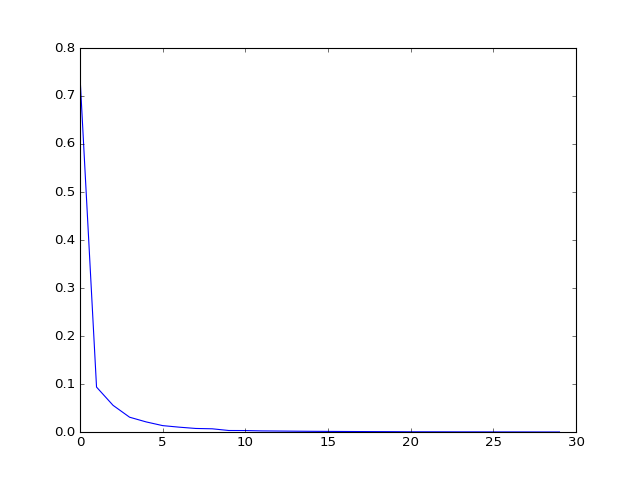

In [23]:
plt.plot(var)

In [24]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [25]:
print(var1)

[  74.12   83.48   89.03   92.11   94.21   95.54   96.55   97.29   97.96
   98.27   98.57   98.8    99.     99.17   99.31   99.44   99.55   99.64
   99.72   99.79   99.83   99.87   99.9    99.93   99.96   99.98  100.
  100.01  100.02  100.02]


In [26]:
components_cumsum95 = sum(var1<95)

In [27]:
print(components_cumsum95)

5


<IPython.core.display.Javascript object>


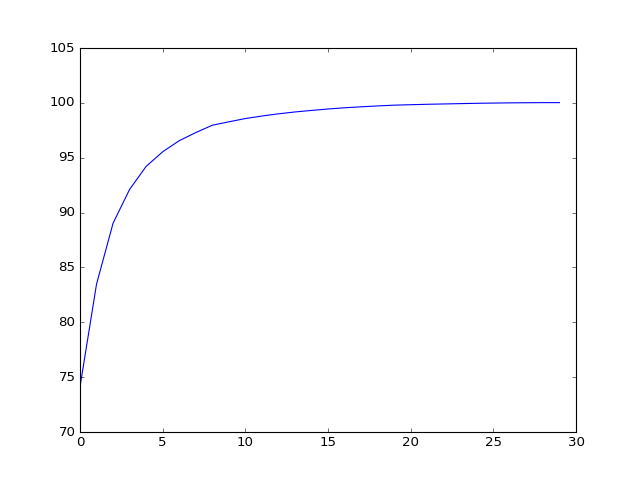

In [28]:
plt.plot(var1)

In [29]:
print("Based on the above for " + filename + "  I will use the first " + str(components_cumsum95) + " components which explains 95% of the variance")

Based on the above for /Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/screen_525_cell_plate_1__all_wells_combined__unnormalized_only.csv  I will use the first 5 components which explains 95% of the variance


### Transform my data based on the PCA results 

In [30]:
pca = decomposition.PCA(n_components = components_cumsum95)

In [31]:
pca.fit(my_scaled_data)

PCA(copy=True, n_components=5, whiten=False)

In [32]:
my_scaled_data_transformed = pca.fit_transform(my_scaled_data)

In [33]:
type(my_scaled_data_transformed)

numpy.ndarray

In [34]:
my_scaled_data_transformed.shape

(1186576, 5)

In [35]:
my_scaled_data_transformed[[0,1,-2,-1]]

array([[ -1.11683506e+02,  -2.64916317e+02,   5.07186147e+02,
          3.89932406e+01,   4.47445273e+02],
       [  5.06504262e+00,   1.44010837e+00,   8.65974450e-01,
         -4.78230252e+00,   4.03670644e-01],
       [  4.08383891e+00,   2.23650461e+00,   4.90788070e-01,
         -3.64736784e+00,   6.92520623e-01],
       [  4.92161742e+00,   3.12894397e+00,   4.06799914e-01,
         -4.18580821e+00,  -6.35410309e-02]])

In [36]:
my_data[my_data_data_headers].shape

(1186576, 30)

#### Convert transformed data into a pandas dataframe and then combine it with the meta data 

In [37]:
# Check that the row order isn't affected
pd.DataFrame(my_scaled_data_transformed[[0,1,-2,-1]])

,0,1,2,3,4
0,-111.683506,-264.916317,507.186147,38.993241,447.445273
1,5.065043,1.440108,0.865974,-4.782303,0.403671
2,4.083839,2.236505,0.490788,-3.647368,0.692521
3,4.921617,3.128944,0.406800,-4.185808,-0.063541


In [38]:
my_scaled_data_transformed_pd = pd.DataFrame(my_scaled_data_transformed)

In [39]:
my_scaled_data_transformed_pd.shape

(1186576, 5)

In [40]:
my_scaled_data_transformed_pd_meta = pd.concat([my_scaled_data_transformed_pd, my_data[meta_headers]], axis=1);
# Note that the above line works because they have the same index, if they didn't and I 
## wanted to perform a cbind, I could say my_scaled_data_transformed_pd.reset_index(drop=True)

In [41]:
my_scaled_data_transformed_pd_meta.shape

(1186576, 12)

In [42]:
print(my_data[meta_headers].head(n=2))
print("NEXT------------------------")
print(my_scaled_data_transformed_pd.head(n=2))
print("NEXT------------------------")
print(my_scaled_data_transformed_pd_meta.head(n=2))

    Width  cell_label    cell_plate lineage      screen      well    Time
0  5288.0  unlabelled  cell_plate_1  parent  screen_525  well_c03  8377.0
1    36.0  unlabelled  cell_plate_1  parent  screen_525  well_c03  8377.0
NEXT------------------------
            0           1           2          3           4
0 -111.683506 -264.916317  507.186147  38.993241  447.445273
1    5.065043    1.440108    0.865974  -4.782303    0.403671
NEXT------------------------
            0           1           2          3           4   Width  \
0 -111.683506 -264.916317  507.186147  38.993241  447.445273  5288.0   
1    5.065043    1.440108    0.865974  -4.782303    0.403671    36.0   

   cell_label    cell_plate lineage      screen      well    Time  
0  unlabelled  cell_plate_1  parent  screen_525  well_c03  8377.0  
1  unlabelled  cell_plate_1  parent  screen_525  well_c03  8377.0  


In [43]:
filename_out = filename.split(".csv")[0] + "_auto_PCAd.csv"
my_scaled_data_transformed_pd_meta.to_csv(filename_out)